In [70]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
df.drop(['Id', 'SepalLengthCm', 'SepalWidthCm'], axis=1, inplace=True)

In [73]:
df.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [74]:
df['petallength']=df['PetalLengthCm']
df['petalwidth']=df['PetalWidthCm']

In [75]:
df.head()

,PetalLengthCm,PetalWidthCm,Species,petallength,petalwidth
0,1.4,0.2,Iris-setosa,1.4,0.2
1,1.4,0.2,Iris-setosa,1.4,0.2
2,1.3,0.2,Iris-setosa,1.3,0.2
3,1.5,0.2,Iris-setosa,1.5,0.2
4,1.4,0.2,Iris-setosa,1.4,0.2


In [76]:
df.drop(['PetalLengthCm','PetalWidthCm'], axis=1, inplace=True)

In [77]:
df.head()

,Species,petallength,petalwidth
0,Iris-setosa,1.4,0.2
1,Iris-setosa,1.4,0.2
2,Iris-setosa,1.3,0.2
3,Iris-setosa,1.5,0.2
4,Iris-setosa,1.4,0.2


In [78]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [79]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [80]:
df.shape

(150, 3)

Text(0, 0.5, 'petalwidth')

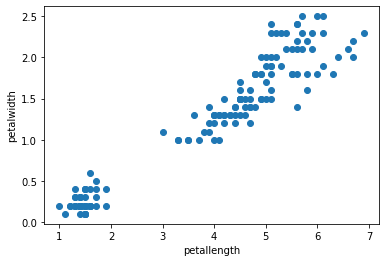

In [81]:
plt.scatter(df.petallength,df.petalwidth)
plt.xlabel('petallength')
plt.ylabel('petalwidth')

In [82]:
from sklearn import preprocessing

In [83]:
le = preprocessing.LabelEncoder()
df.Species = le.fit_transform(df.Species)

In [84]:
df.head()

,Species,petallength,petalwidth
0,0,1.4,0.2
1,0,1.4,0.2
2,0,1.3,0.2
3,0,1.5,0.2
4,0,1.4,0.2


In [85]:
df.tail()

,Species,petallength,petalwidth
145,2,5.2,2.3
146,2,5.0,1.9
147,2,5.2,2.0
148,2,5.4,2.3
149,2,5.1,1.8


In [86]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petallength', 'petalwidth']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
df['cluster']=y_predicted
df.head()

,Species,petallength,petalwidth,cluster
0,0,1.4,0.2,1
1,0,1.4,0.2,1
2,0,1.3,0.2,1
3,0,1.5,0.2,1
4,0,1.4,0.2,1


In [88]:
km.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

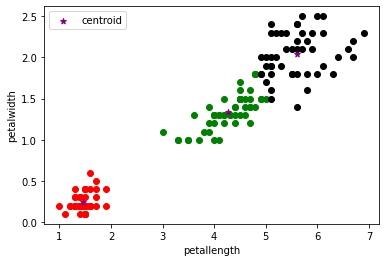

In [89]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petallength'],df1['petalwidth'],color='green')
plt.scatter(df2['petallength'],df2['petalwidth'],color='red')
plt.scatter(df3['petallength'],df3['petalwidth'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('petallength')
plt.ylabel('petalwidth')
plt.legend()

In [94]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petallength','petalwidth']])
    sse.append(km.inertia_)

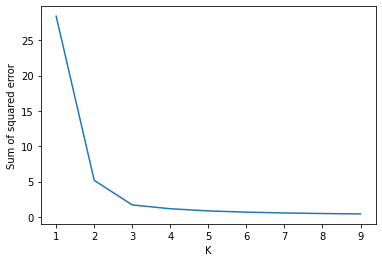

In [95]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)